数据概览：
   序号         开课学期        课程编号         课程名称  课序号  过程评价  期末成绩  成绩   绩点 绩点对应等级  \
0   1  2022-2023-1    26020210     东北亚历史与文化  NaN  91.0  92.0  92  4.2      A   
1   3  2022-2023-1    26031050      国际政治学概论  NaN  99.0  91.0  94  4.4      A   
2   4  2022-2023-1  2603600008        国际关系史  NaN  83.0  85.0  84  3.4     B+   
3   5  2022-2023-1    26039070  国际政治专业英语(1)  NaN  91.0  70.5  79  2.9      B   
4   6  2022-2023-1    26039190        经济学原理  NaN  98.0  86.0  90  4.0      A   

   成绩标识   学分  总学时 考核方式  考试性质 课程属性 课程性质                 成绩状态 通选课类别  
0   NaN  2.0   32   考试  正常考试   必修   其他                  NaN   NaN  
1   NaN  2.0   32   考试  正常考试   必修   其他                  NaN   NaN  
2   NaN  2.0   32   考试  正常考试   必修   其他                  NaN   NaN  
3   NaN  2.0   96   考试  正常考试   必修   其他  成绩认定删除,新课程[大学外语（1）]   NaN  
4   NaN  2.0   32   考试  正常考试   必修   其他                  NaN   NaN  

总学分: 139.50
总加权绩点: 491.35
总体绩点: 3.52

成绩统计分析：
count    66.000000
mean     85.530303
std       7.704583
m

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30072\627701705.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['加权绩点'] = df_clean['绩点'] * df_clean['学分']


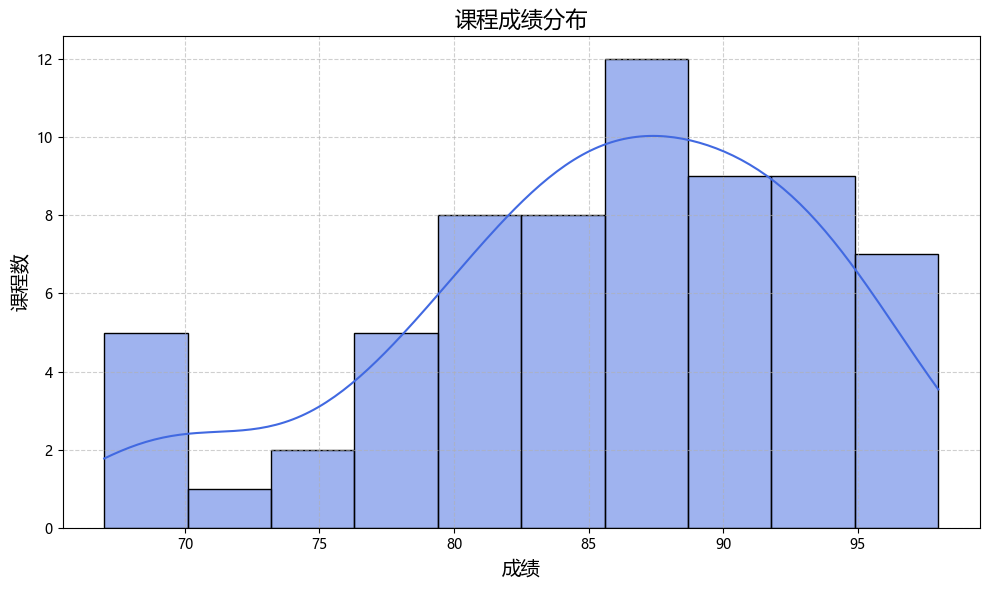

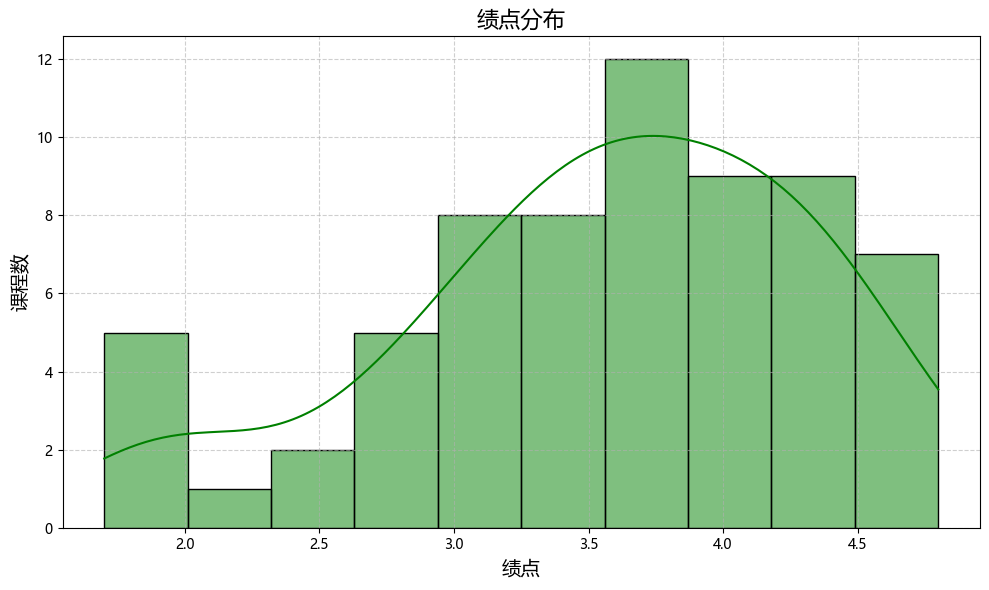


课程数量按分数段统计：
分数段
不及格     0
及格      3
中等     10
良好     30
优秀     23
Name: count, dtype: int64

按分数段的详细统计信息：
     课程数量   总学分      平均绩点       平均成绩  平均加权绩点
分数段                                         
不及格     0   0.0       NaN        NaN     NaN
及格      3   6.0  1.800000  68.000000   3.500
中等     10  21.5  2.510000  75.100000   5.490
良好     30  69.5  3.483333  84.833333   8.065
优秀     23  42.5  4.326087  93.260870   8.000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30072\627701705.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['分数段'] = pd.cut(df_clean['成绩'], bins=bins, labels=labels, right=False)  # right=False表示左闭右开区间
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30072\627701705.py:103: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = df_clean.groupby('分数段').agg(


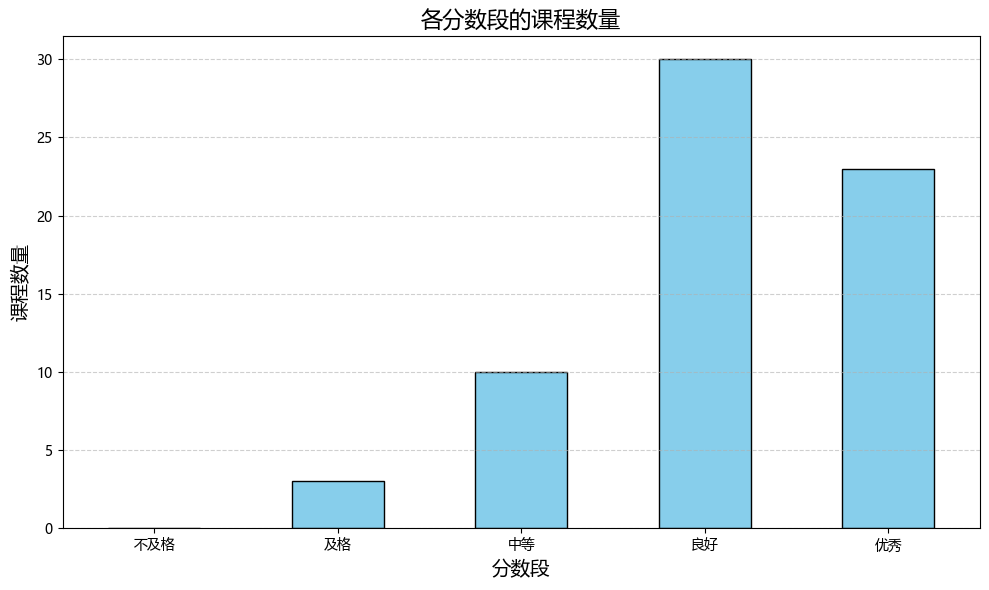

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取成绩单 Excel 文件
file_path = r'C:\Users\Lenovo\Downloads\绩点.xlsx'
df = pd.read_excel(file_path)

# 根据成绩等级转换为分数
def grade_to_score(value):
    if isinstance(value, str):
        if value == '优':
            return 95
        elif value == '合格':
            return 85
        else:
            return 0  # 其他情况返回0
    elif isinstance(value, (int, float)):
        return value  # 如果是数字直接返回
    else:
        return 0  # 非法值处理

# 应用转换函数
df['成绩'] = df['成绩'].apply(grade_to_score)

# 数据清洗：选择有用的列
df_clean = df[['课程名称', '成绩', '绩点', '学分']]

# 计算加权绩点 = 绩点 * 学分
df_clean['加权绩点'] = df_clean['绩点'] * df_clean['学分']

# 计算总学分和总加权绩点
total_credits = df_clean['学分'].sum()
total_weighted_gpa = df_clean['加权绩点'].sum()

# 计算总体绩点
overall_gpa = total_weighted_gpa / total_credits

# 输出统计结果
print("数据概览：")
print(df.head())

print(f"\n总学分: {total_credits:.2f}")
print(f"总加权绩点: {total_weighted_gpa:.2f}")
print(f"总体绩点: {overall_gpa:.2f}")

# 设置字体，解决中文显示问题
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 设置字体为微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 进一步的统计信息
score_stats = df['成绩'].describe()
gpa_stats = df['绩点'].describe()
credit_stats = df['学分'].describe()
weighted_gpa_stats = df_clean['加权绩点'].describe()

# 打印统计信息
print("\n成绩统计分析：")
print(score_stats)
print("\n绩点统计分析：")
print(gpa_stats)
print("\n学分统计分析：")
print(credit_stats)
print("\n加权绩点统计分析：")
print(weighted_gpa_stats)

# 可视化：课程成绩分布
plt.figure(figsize=(10, 6))
sns.histplot(df['成绩'], bins=10, kde=True, color='royalblue')
plt.title('课程成绩分布', fontsize=16)
plt.xlabel('成绩', fontsize=14)
plt.ylabel('课程数', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 可视化：绩点分布
plt.figure(figsize=(10, 6))
sns.histplot(df['绩点'], bins=10, kde=True, color='green')
plt.title('绩点分布', fontsize=16)
plt.xlabel('绩点', fontsize=14)
plt.ylabel('课程数', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# 定义分数段
bins = [0, 60, 70, 80, 90, 100]  # 定义分数的边界
labels = ['不及格', '及格', '中等', '良好', '优秀']  # 为每个分数段定义标签

# 将成绩分组
df_clean['分数段'] = pd.cut(df_clean['成绩'], bins=bins, labels=labels, right=False)  # right=False表示左闭右开区间

# 统计每个分数段的课程数量
score_group_stats = df_clean['分数段'].value_counts().sort_index()

# 输出统计结果
print("\n课程数量按分数段统计：")
print(score_group_stats)

# 按分数段分组并统计学分、加权绩点等信息
grouped_stats = df_clean.groupby('分数段').agg(
    课程数量=('课程名称', 'count'),
    总学分=('学分', 'sum'),
    平均绩点=('绩点', 'mean'),
    平均成绩=('成绩', 'mean'),
    平均加权绩点=('加权绩点', 'mean')
)

print("\n按分数段的详细统计信息：")
print(grouped_stats)

# 可视化：按分数段统计课程数量
plt.figure(figsize=(10, 6))
score_group_stats.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('各分数段的课程数量', fontsize=16)
plt.xlabel('分数段', fontsize=14)
plt.ylabel('课程数量', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30072\3108966532.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  semester_stats = df.groupby(['开课学期', '分数段']).size().reset_index(name='课程数量')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30072\3108966532.py:63: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  semester_gpa = df.groupby('开课学期').apply(lambda x: (x['绩点'] * x['学分']).sum() / x['学分'].sum()).reset_index(name='平均绩点')


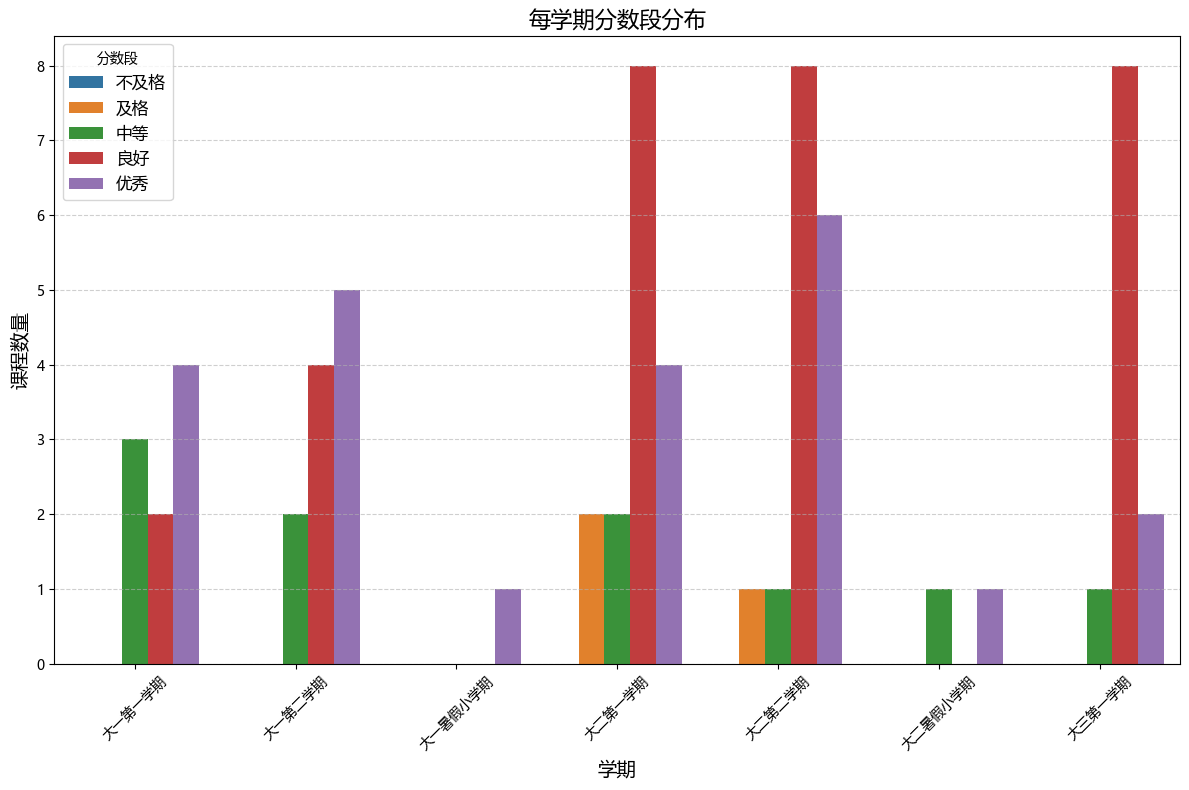

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30072\3108966532.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  semester_stats = df.groupby(['开课学期', '分数段']).size().reset_index(name='课程数量')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30072\3108966532.py:139: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  semester_gpa = df.groupby('开课学期').apply(lambda x: (x['绩点'] * x['学分']).sum() / x['学分'].sum()).reset_index(name='平均绩点')


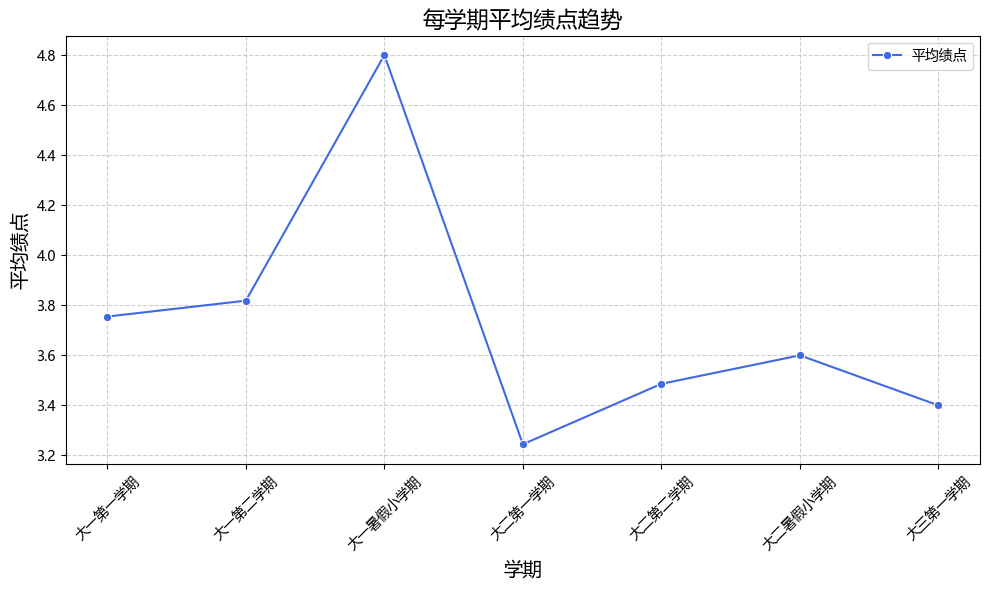

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设已整理的 Excel 文件路径
file_path = r'C:\Users\Lenovo\Downloads\绩点.xlsx'
df = pd.read_excel(file_path)

# 1. 转换成绩和分数段
def grade_to_score(value):
    if isinstance(value, str):
        if value == '优':
            return 95
        elif value == '合格':
            return 85
        else:
            return 0
    elif isinstance(value, (int, float)):
        return value
    else:
        return 0

df['成绩'] = df['成绩'].apply(grade_to_score)
bins = [0, 60, 70, 80, 90, 100]
labels = ['不及格', '及格', '中等', '良好', '优秀']
df['分数段'] = pd.cut(df['成绩'], bins=bins, labels=labels, right=False)

# 2. 推测学期，数据示例需要真实字段调整
def determine_semester(value):
    mapping = {
        '2022-2023-1': '大一第一学期',
        '2022-2023-2': '大一第二学期',
        '2022-2023-3': '大一暑假小学期',
        '2023-2024-1': '大二第一学期',
        '2023-2024-3': '大二暑假小学期',
        '2023-2024-2': '大二第二学期',
        '2024-2025-1': '大三第一学期'
    }
    return mapping.get(value, '未知')  # 如果不匹配，则返回 '未知'

df['开课学期'] = df['开课学期'].apply(determine_semester)

# 3. 添加排序列，按学期的时间顺序排序
semester_order = {
    '大一第一学期': 1,
    '大一第二学期': 2,
    '大一暑假小学期': 3,
    '大二第一学期': 4,
    '大二第二学期': 5,
    '大二暑假小学期': 6,
    '大三第一学期': 7,
}

df['学期排序'] = df['开课学期'].map(semester_order)

# 4. 计算每学期分数段统计
semester_stats = df.groupby(['开课学期', '分数段']).size().reset_index(name='课程数量')

# 5. 为了排序，把 '学期排序' 列加入到 `semester_stats`
semester_stats = semester_stats.merge(df[['开课学期', '学期排序']].drop_duplicates(), on='开课学期')

# 6. 每学期平均绩点
semester_gpa = df.groupby('开课学期').apply(lambda x: (x['绩点'] * x['学分']).sum() / x['学分'].sum()).reset_index(name='平均绩点')

# 7. 可视化：分数段分布
plt.figure(figsize=(12, 8))
sns.barplot(data=semester_stats.sort_values('学期排序'), x='开课学期', y='课程数量', hue='分数段', palette='tab10')
plt.title('每学期分数段分布', fontsize=16)
plt.xlabel('学期', fontsize=14)
plt.ylabel('课程数量', fontsize=14)
plt.legend(title='分数段', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设已整理的 Excel 文件路径
file_path = r'C:\Users\Lenovo\Downloads\绩点.xlsx'
df = pd.read_excel(file_path)

# 1. 转换成绩和分数段
def grade_to_score(value):
    if isinstance(value, str):
        if value == '优':
            return 95
        elif value == '合格':
            return 85
        else:
            return 0
    elif isinstance(value, (int, float)):
        return value
    else:
        return 0

df['成绩'] = df['成绩'].apply(grade_to_score)
bins = [0, 60, 70, 80, 90, 100]
labels = ['不及格', '及格', '中等', '良好', '优秀']
df['分数段'] = pd.cut(df['成绩'], bins=bins, labels=labels, right=False)

# 2. 推测学期，数据示例需要真实字段调整
def determine_semester(value):
    mapping = {
        '2022-2023-1': '大一第一学期',
        '2022-2023-2': '大一第二学期',
        '2022-2023-3': '大一暑假小学期',
        '2023-2024-1': '大二第一学期',
        '2023-2024-3': '大二暑假小学期',
        '2023-2024-2': '大二第二学期',
        '2024-2025-1': '大三第一学期'
    }
    return mapping.get(value, '未知')  # 如果不匹配，则返回 '未知'

df['开课学期'] = df['开课学期'].apply(determine_semester)

# 3. 添加排序列，按学期的时间顺序排序
semester_order = {
    '大一第一学期': 1,
    '大一第二学期': 2,
    '大一暑假小学期': 3,
    '大二第一学期': 4,
    '大二第二学期': 5,
    '大二暑假小学期': 6,
    '大三第一学期': 7,
}

df['学期排序'] = df['开课学期'].map(semester_order)

# 4. 计算每学期分数段统计
semester_stats = df.groupby(['开课学期', '分数段']).size().reset_index(name='课程数量')

# 5. 为了排序，把 '学期排序' 列加入到 `semester_stats`
semester_stats = semester_stats.merge(df[['开课学期', '学期排序']].drop_duplicates(), on='开课学期')

# 6. 每学期平均绩点
semester_gpa = df.groupby('开课学期').apply(lambda x: (x['绩点'] * x['学分']).sum() / x['学分'].sum()).reset_index(name='平均绩点')

# 7. 为了正确排序 'semester_gpa'，合并 '学期排序' 列
semester_gpa = semester_gpa.merge(df[['开课学期', '学期排序']].drop_duplicates(), on='开课学期')

# 8. 可视化：平均绩点趋势
plt.figure(figsize=(10, 6))
sns.lineplot(data=semester_gpa.sort_values('学期排序'), x='开课学期', y='平均绩点', marker='o', color='royalblue', label='平均绩点')
plt.title('每学期平均绩点趋势', fontsize=16)
plt.xlabel('学期', fontsize=14)
plt.ylabel('平均绩点', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

